In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import scipy.stats as stats

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [11]:
(df["Price"].isnull().sum())/df.shape[0]

0.2183205668875692

In [29]:
df = df.dropna(subset="Price")

In [13]:

df['id'] = df['Lattitude'].astype(str) + ', ' + df['Longtitude'].astype(str)

In [17]:
type_houses_count = df.groupby("Type")["id"].count()

In [18]:
total_count = df["id"].count()

In [19]:
type_houses_count/total_count

Type
h    0.687954
t    0.102705
u    0.209341
Name: id, dtype: float64

<Axes: xlabel='Type', ylabel='id'>

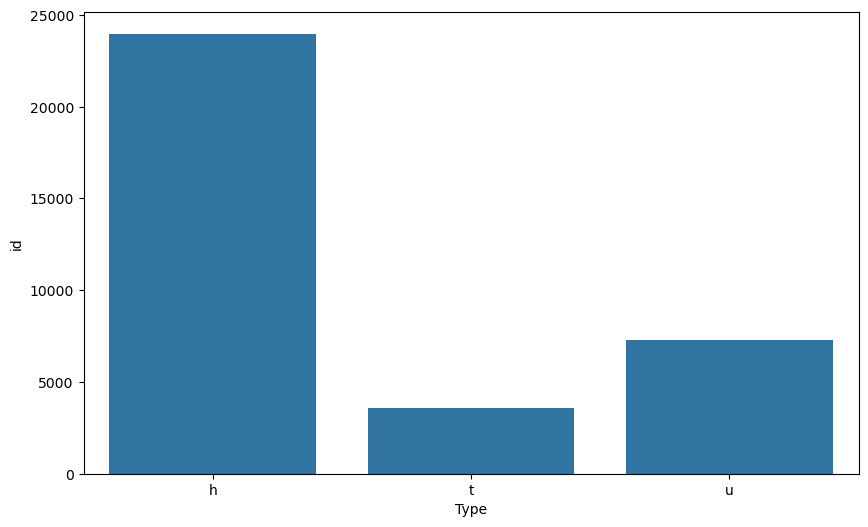

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(type_houses_count)

C:\Users\osanc\AppData\Local\Temp\ipykernel_9252\3707402343.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Rooms", y="Price", estimator=sum, ci=None)


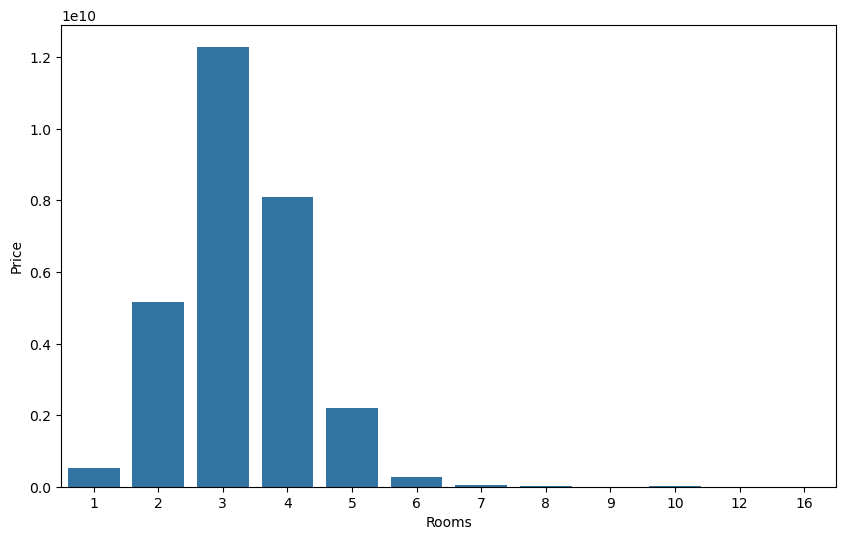

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Rooms", y="Price", estimator=sum, ci=None)
plt.show()

In [34]:
coeficiente, p_valor = spearmanr(df['Price'], df['Rooms'])
print(f"coeficiente{coeficiente}")
print(f"p-value{p_valor}")

coeficiente0.5042971590926004
p-value0.0


<Axes: xlabel='Distance', ylabel='Price'>

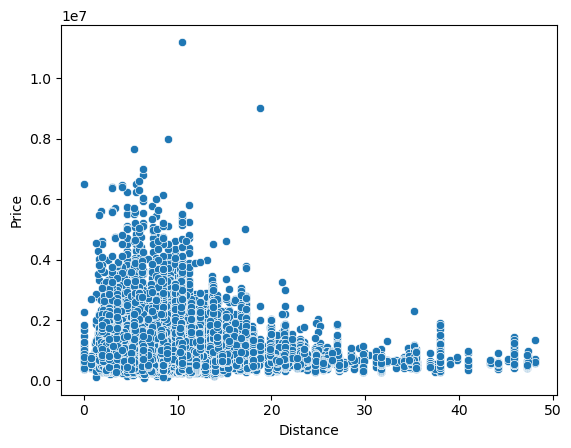

In [35]:
sns.scatterplot(df,x = "Distance", y="Price")

<Axes: xlabel='Landsize', ylabel='Price'>

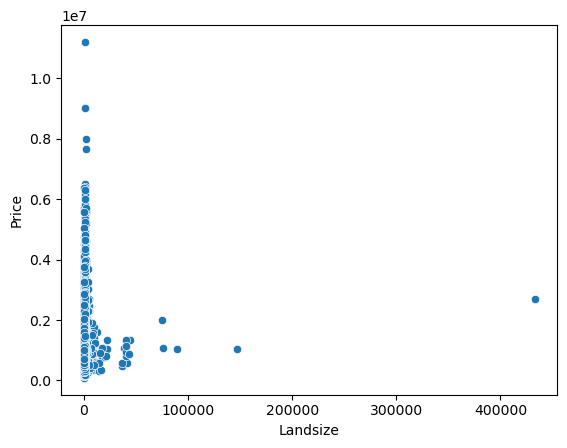

In [37]:
sns.scatterplot(df,x = "Landsize", y="Price")

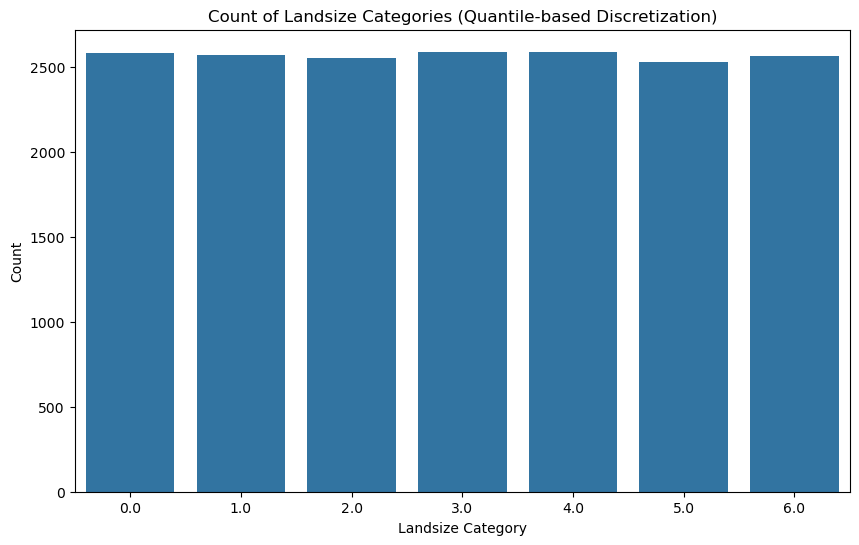

In [42]:
# Discretize the Landsize variable into 5 quantiles
df['Landsize_Category'] = pd.qcut(df['Landsize'], q=7, labels=False)

# Count occurrences of each Landsize category
category_counts = df['Landsize_Category'].value_counts().sort_index()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=category_counts.index, y=category_counts.values)

# Add titles and labels
plt.title('Count of Landsize Categories (Quantile-based Discretization)')
plt.xlabel('Landsize Category')
plt.ylabel('Count')

# Show the plot
plt.show()

<Axes: xlabel='Price'>

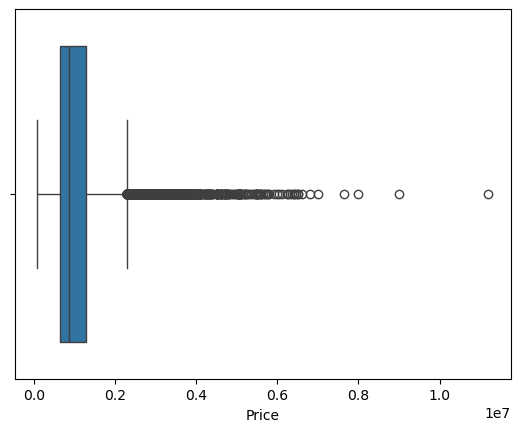

In [43]:
sns.boxplot(df, x= "Price")

In [44]:
# Calculate Q1, Q3, and IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print the results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")

Q1: 635000.0
Q3: 1295000.0
IQR: 660000.0
Lower Whisker: -355000.0
Upper Whisker: 2285000.0


In [45]:
# Identificar outliers
outliers = df[(df['Price'] < lower_whisker) | (df['Price'] > upper_whisker)]

# Número de outliers
num_outliers = outliers.shape[0]

# Número total de propiedades
total_properties = df.shape[0]

# Calcular el porcentaje de outliers
percentage_outliers = (num_outliers / total_properties) * 100

# Mostrar los resultados
print("Outliers identificados:")
print(outliers)
print(f"Número de propiedades identificadas como outliers: {num_outliers}")
print(f"Número total de propiedades: {total_properties}")
print(f"Porcentaje de outliers: {percentage_outliers:.2f}%")

Outliers identificados:
               Suburb                Address  Rooms Type      Price Method  \
135       Albert Park   112 Beaconsfield Pde      3    h  2850000.0     PI   
142       Albert Park      104 Richardson St      4    h  2300000.0      S   
146       Albert Park        114 Victoria Av      3    h  2485000.0      S   
152       Albert Park            2 Dundas Pl      3    h  2615000.0      S   
158       Albert Park          70 Barrett St      3    h  2575000.0      S   
...               ...                    ...    ...  ...        ...    ...   
34619  Port Melbourne           142 Beach St      4    h  2300000.0     PI   
34623  Port Melbourne  1/29 Beaconsfield Pde      3    u  2610000.0      S   
34632         Prahran           61 Murray St      3    h  2500000.0     VB   
34714     South Yarra             54 Oban St      3    h  2855000.0     PI   
34719       Southbank    611/250 St Kilda Rd      3    u  2685000.0      S   

            SellerG        Date  Distan

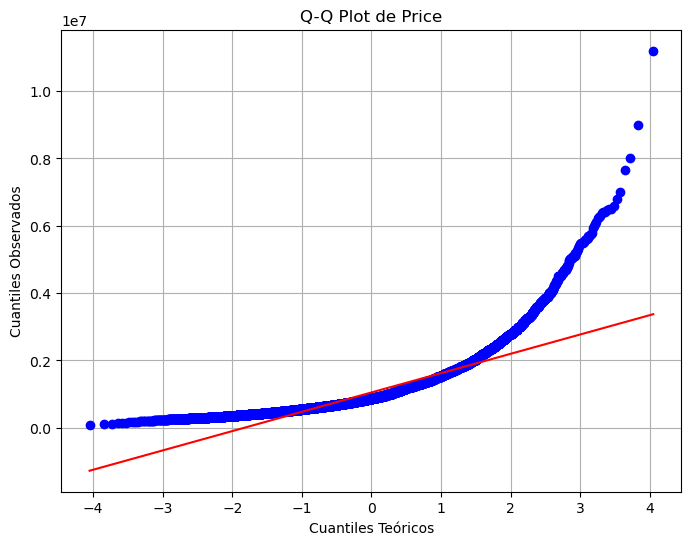

In [48]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Price')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles Observados')
plt.grid()

In [49]:
standardized_saleprice = (df['Price'] - df['Price'].mean()) / df['Price'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(0.13751284953784154, 0.0)

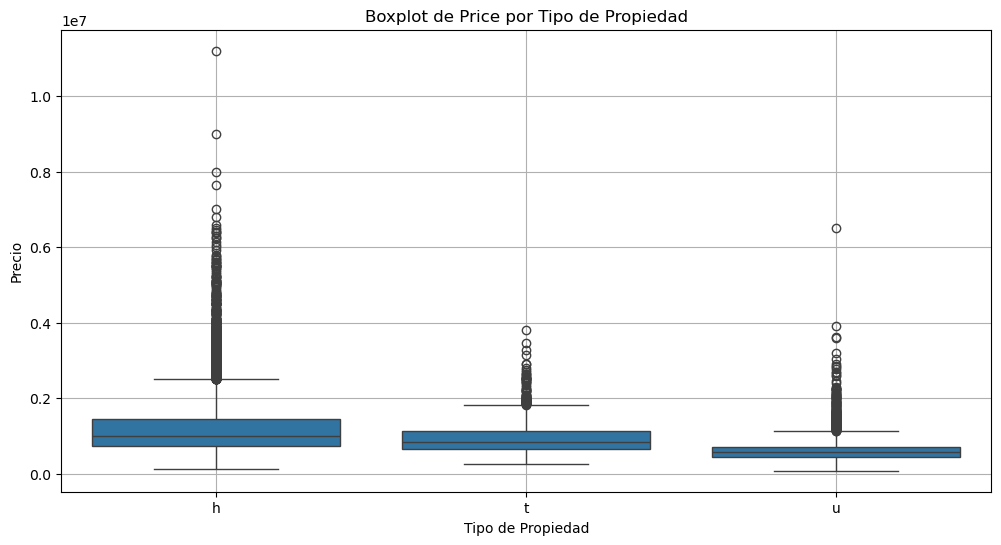

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type', y='Price')
plt.title('Boxplot de Price por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.grid()
plt.show()

In [52]:
# Calcular el precio medio por región
mean_price_per_region = df.groupby('Regionname')['Price'].mean().reset_index()

# Encontrar la región con el precio medio más alto
highest_mean_price_region = mean_price_per_region.loc[mean_price_per_region['Price'].idxmax()]

# Encontrar la región con el precio medio más bajo
lowest_mean_price_region = mean_price_per_region.loc[mean_price_per_region['Price'].idxmin()]


print(highest_mean_price_region)
print(lowest_mean_price_region)

Regionname    Southern Metropolitan
Price                1395928.334115
Name: 5, dtype: object
Regionname    Western Victoria
Price            432606.770833
Name: 7, dtype: object
